In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/marketing_campaign.csv', sep='	')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_For_Days'] = (pd.to_datetime('2024-01-01') - df['Dt_Customer']).dt.days

categorical_cols = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df = df.drop(['ID', 'Dt_Customer'], axis=1)

df = df.fillna(df.median(numeric_only=True))

In [4]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4136,False,True,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,3586,False,True,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,3785,False,True,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,3612,False,True,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3634,False,False,False,True,False,False,True,False,False,False,False


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
     

In [6]:

from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
reduced_data = pca.fit_transform(scaled_data)
print('Nombre de composantes conservées :', pca.n_components_)

Nombre de composantes conservées : 24


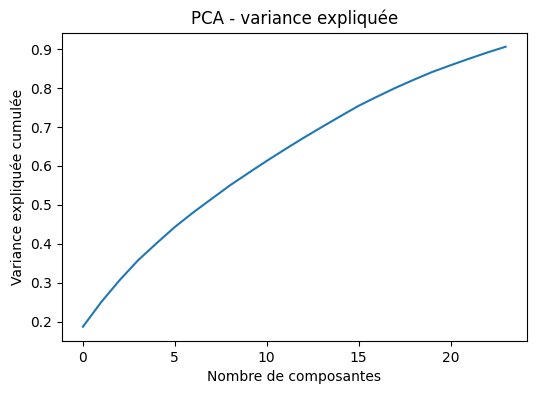

In [7]:
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('PCA - variance expliquée')
plt.show()

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(reduced_data)
sil_kmeans = silhouette_score(reduced_data, labels_kmeans)

cah = AgglomerativeClustering(n_clusters=4)
labels_cah = cah.fit_predict(reduced_data)
sil_cah = silhouette_score(reduced_data, labels_cah)

dbscan = DBSCAN(eps=2, min_samples=5)
labels_db = dbscan.fit_predict(reduced_data)
mask = labels_db != -1
sil_db = silhouette_score(reduced_data[mask], labels_db[mask]) if mask.sum() > 1 else np.nan

print('Silhouette K-means:', sil_kmeans)
print('Silhouette CAH:', sil_cah)
print('Silhouette DBSCAN:', sil_db)

Silhouette K-means: 0.0909394573769894
Silhouette CAH: 0.10508710083643837
Silhouette DBSCAN: 0.23321414178291167


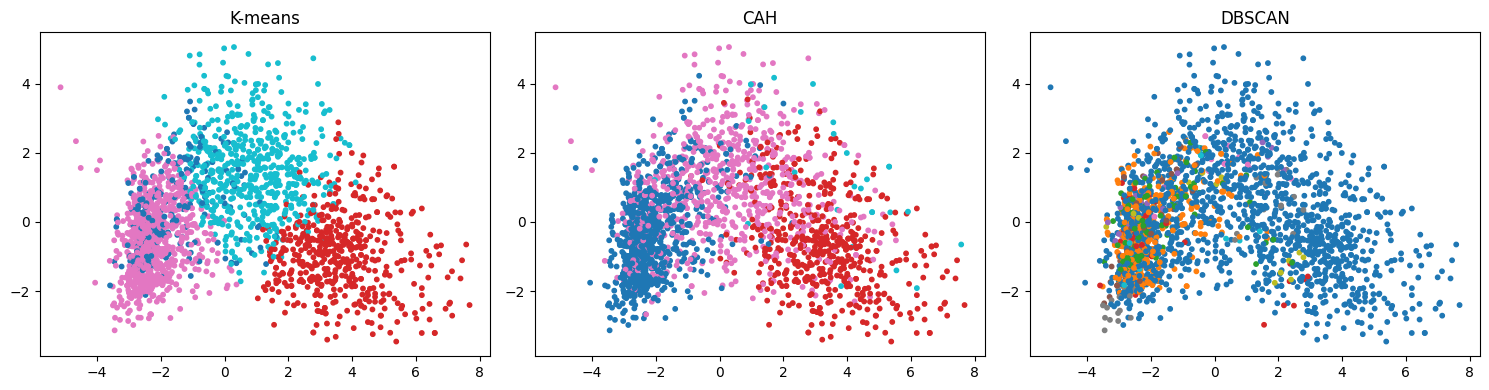

In [9]:
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(scaled_data)

fig, axes = plt.subplots(1,3, figsize=(15,4))
for ax, labels, title in zip(axes, [labels_kmeans, labels_cah, labels_db], ['K-means', 'CAH', 'DBSCAN']):
    ax.scatter(reduced_2d[:,0], reduced_2d[:,1], c=labels, cmap='tab10', s=10)
    ax.set_title(title)
plt.tight_layout()
plt.show()

In [10]:
df_clusters = df.copy()
df_clusters['Cluster_KMeans'] = labels_kmeans
profil_kmeans = df_clusters.groupby('Cluster_KMeans').mean(numeric_only=True)
profil_kmeans

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For_Days,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1968.045082,42986.403689,0.635246,0.594262,47.176230,139.299180,6.446721,48.913934,9.233607,5.745902,24.274590,2.467213,3.200820,1.176230,4.209016,5.967213,0.057377,0.036885,0.004098,0.000000,0.000000,0.008197,3.0,11.0,0.102459,3776.106557,0.000000,0.000000,0.995902,0.000000,0.004098,0.102459,0.385246,0.180328,0.307377,0.020492,0.00000
1,1968.988327,78474.666342,0.036965,0.107004,49.472763,618.809339,68.052529,483.653696,101.301556,70.500000,77.083658,1.184825,4.947471,6.143969,8.307393,2.634241,0.079767,0.140078,0.297665,0.239300,0.036965,0.003891,3.0,11.0,0.311284,3821.933852,0.000000,0.566148,0.142023,0.196498,0.000000,0.089494,0.348249,0.256809,0.260700,0.040856,0.00000
2,1971.943503,34755.106780,0.797740,0.440678,50.106215,41.724294,5.378531,23.748023,7.648588,5.367232,15.390960,2.103955,2.137853,0.544633,3.228249,6.523164,0.073446,0.010169,0.000000,0.001130,0.002260,0.013559,3.0,11.0,0.088136,3801.227119,0.059887,0.592090,0.000000,0.222599,0.002260,0.092655,0.401130,0.229379,0.248588,0.025989,0.00000
3,1964.308208,59346.958961,0.192630,0.911223,48.108878,488.832496,29.489112,154.804020,38.469012,30.539363,66.070352,3.576214,6.589615,3.410385,8.067002,5.571189,0.072027,0.128978,0.015075,0.033501,0.015075,0.008375,3.0,11.0,0.118928,3888.800670,0.001675,0.522613,0.090452,0.314908,0.000000,0.132328,0.395310,0.169179,0.252931,0.046901,0.00335
